In [24]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow Version :", tf.__version__)

TensorFlow Version : 2.16.1


In [25]:
import os
import cv2
import random
import numpy as np

img_size_224p = 128 # ⚠️Can be Customized⚠️ If use 224 pixels, it will be Out of Memory (OOM)

path_train  = '../data/orchid-genus/train'
path_test   = '../data/orchid-genus/test'
categories  = ['cattleya', 'dendrobium', 'oncidium', 'phalaenopsis', 'vanda']

def create_data_img(folder_path):
    imageData = []
    for category in categories:
        path = os.path.join(folder_path, category)
        class_num = categories.index(category) # Take the Label as the Index
        for img in os.listdir(path):
            img_array   = cv2.imread(os.path.join(path, img)) 
            img_convert = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resize  = cv2.resize(img_convert, (img_size_224p, img_size_224p))
            imageData.append([img_resize, class_num])
    
    return imageData

dataTrain   = create_data_img(path_train)
dataTest    = create_data_img(path_test)

# Shuffle the Train Data (if don't shuffle, the Train Data will be sorted by Labels)
random.seed(10) # 10 as the Shuffle Index, so that when re-running the program, the results of the shuffle are the same
random.shuffle(dataTrain)

In [26]:
# X for Features & y for Labels
X_train, y_train, X_test, y_test = [], [], [], []

for features, label in dataTrain:
    X_train.append(features)
    y_train.append(label)

for features, label in dataTest:
    X_test.append(features)
    y_test.append(label)

# -1 in reshape, means to let Numpy define the appropriate data dimensions
X_train = np.array(X_train).reshape(-1, img_size_224p, img_size_224p, 3)
y_train = np.asarray(y_train)
X_test  = np.array(X_test).reshape(-1, img_size_224p, img_size_224p, 3)
y_test  = np.asarray(y_test)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)

X_train : (4000, 128, 128, 3)
y_train : (4000,)
X_test  : (2500, 128, 128, 3)
y_test  : (2500,)


In [27]:
print("Array of X_train :\n\n", X_train[0]) # Take the first data for example
print("\nArray of X_test  :\n\n", X_test[0])

def prep_pixels(train, test):
    # Convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # Normalize (feature scaling) to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # Return normalized images
    return train_norm, test_norm

X_train_norm, X_test_norm = prep_pixels(X_train, X_test)

print("\nArray of X_train_norm :\n\n", X_train_norm[0])
print("\nArray of X_test_norm  :\n\n", X_test_norm[0])

Array of X_train :

 [[[ 31  35  44]
  [ 32  36  46]
  [ 30  34  44]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[ 34  38  47]
  [ 34  38  47]
  [ 31  35  44]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[ 33  37  46]
  [ 33  37  46]
  [ 29  33  42]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[255 254 254]
  [253 253 253]
  [249 254 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 253 249]
  [254 255 253]
  [249 252 253]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 249]
  [253 253 251]
  [251 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]

Array of X_test  :

 [[[210 199 171]
  [202 193 166]
  [194 188 164]
  ...
  [113  98  83]
  [119 112  98]
  [178 177 162]]

 [[215 205 178]
  [198 191 166]
  [191 185 162]
  ...
  [205 196 186]
  [201 198 190]
  [203 203 196]]

 [[216 209 183]
  [210 204 181]
  [204 198 178]
  ...
  [199 197 197]
  [200 200 201]
  [196 197 199]]

 ...

 [[ 99 10

In [28]:
from keras.utils import to_categorical

print("Array of y_train :", y_train)
print("Array of y_test  :", y_test)

# One Hot Encode target values
y_train_encode = to_categorical(y_train)
y_test_encode  = to_categorical(y_test)

print("\nArray of y_train_encode :\n\n", y_train_encode)
print("\nArray of y_test_encode :\n\n", y_test_encode)

Array of y_train : [3 2 4 ... 2 0 2]
Array of y_test  : [0 0 0 ... 4 4 4]

Array of y_train_encode :

 [[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]

Array of y_test_encode :

 [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


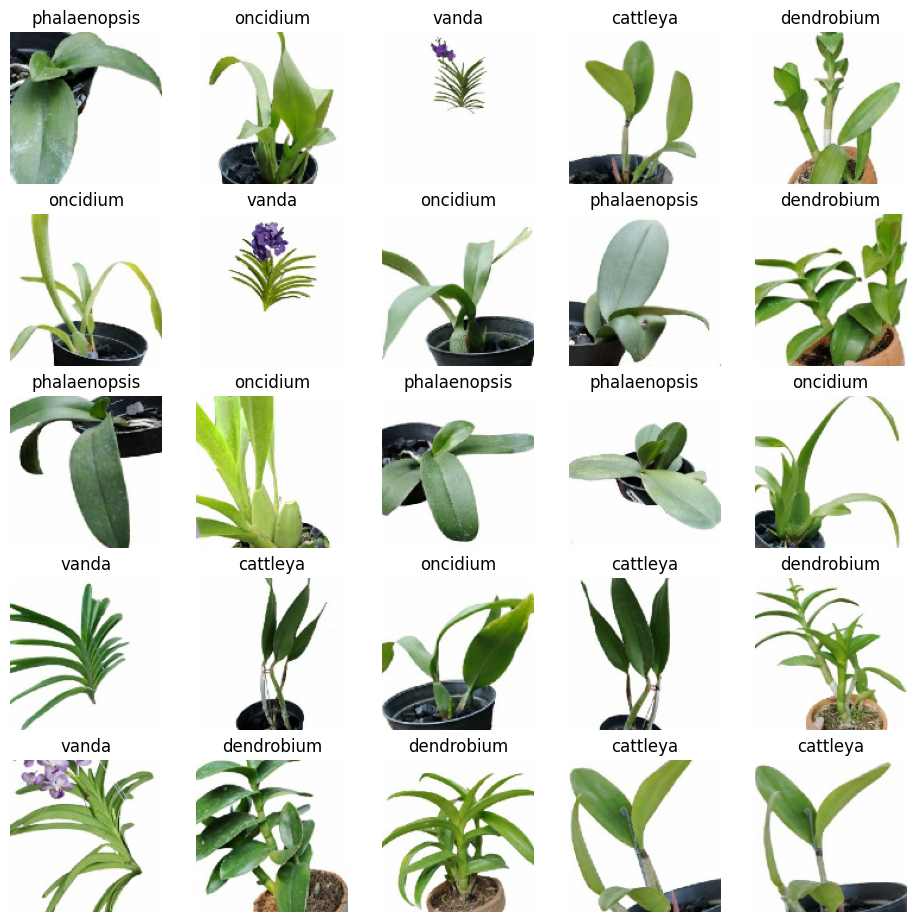

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

nrows = 5 # ⚠️Can be Customized⚠️
ncols = 5 # ⚠️Can be Customized⚠️
hspace = 0
wspace = 0
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))    
fig.subplots_adjust(hspace, wspace)

for i in range(nrows):
    for j in range(ncols):
        temp = i*ncols+j                # Index looping
        ax[i,j].imshow(X_train[temp])   # Show Features/images
        if y_train[temp] == 0:
            judul = "cattleya"
        elif y_train[temp] == 1:
            judul = "dendrobium"
        elif y_train[temp] == 2:
            judul = "oncidium"
        elif y_train[temp] == 3:
            judul = "phalaenopsis"
        elif y_train[temp] == 4:
            judul = "vanda"
        ax[i,j].set_title(judul)        # Show Labels
        ax[i,j].axis('off')             # Hide axis
plt.show()

In [30]:
import gc     # Gabage Collector for cleaning deleted data from memory

del dataTrain
del dataTest
del X_train
del X_test
#del y_train  # Used later for Confusion Matrix
#del y_test   # Used later for Confusion Matrix

gc.collect()

48355

In [31]:
print("X_train_norm     :", X_train_norm.shape)
print("y_train_encode   :", y_train_encode.shape)
print("X_test_norm      :", X_test_norm.shape)
print("y_test_encode    :", y_test_encode.shape)

X_train_norm     : (4000, 128, 128, 3)
y_train_encode   : (4000, 5)
X_test_norm      : (2500, 128, 128, 3)
y_test_encode    : (2500, 5)


In [32]:
from keras.applications import MobileNetV2
from keras.utils import plot_model

'''
Important Notes:

weights='imagenet'            The initial weights are filled directly with the "optimal" weight of the imagenet (pre-trained).
weights=None                  The initial weight are filled with a random value (in case: training from scratch).
include_top=False             Cut the head (top) of mobilenetv2 architecture, so that it can be modified according to the label used (in case: orchid).
conv_base.trainable=False     Can only be used if weights="imagenet", this means the weight in the feature extractor will be frozen,
                              it will not be updated during training, in other words, the extractor feature is only used.
'''

conv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size_224p, img_size_224p, 3))
conv_base.trainable = False
conv_base.summary()
plot_model(conv_base, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

Model: "mobilenetv2_1.00_128"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.optimizers import Adam

def define_model_mobilenetv2():
    model = Sequential()
    model.add(conv_base)                        # The Feature Extractor uses a Pre-trained Model
    model.add(GlobalAveragePooling2D())
    model.add(Dense(5, activation='softmax'))   # This means that in the Hidden Layer there are 5 Neurons (5 Orchid Labels)
                                                # activation='softmax'is used because of the Multi-Class Classification problem
    
    # Compile Model
    opt = Adam(learning_rate=0.0001)                       # ⚠️Can be Customized⚠️
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy is used because
    return model                                                                        # of the Multi-Class Classification problem

# Clean the Previous Model (retraining needs)
if "model" in globals(): # Check if the Model Variables exist
    del model
    gc.collect()

model = define_model_mobilenetv2()
model.summary()

# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_20     │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
%%time

import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit

def evaluate_model(dataX, dataY, n_folds=5):  # ⚠️Can be Customized⚠️ At this step, the Train Data will be split into Train and Validation Data
    epochs = 10                               # ⚠️Can be Customized⚠️
    batch_size = 64                           # ⚠️Can be Customized⚠️

    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle=True, random_state=1) # 1 as the Shuffle Index, so that when re-running the program, the results of the shuffle are the same

    i = 0
    # Enumerate splits
    for train_ix, val_ix in kfold.split(dataX):
        i = i+1
        model = define_model_mobilenetv2() # Define Model: Using MobileNetV2 which has been modified before
        trainX, trainY, valX, valY = dataX[train_ix], dataY[train_ix], dataX[val_ix], dataY[val_ix]  # Select rows for Train and Validation
        history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(valX, valY), verbose=1) # Fit Model
        loss, acc = model.evaluate(valX, valY, verbose=0) # Evaluate Model
        print('\nFold ' + str(i) + ' Accuracy = %.3f' % (acc * 100.0))
        print('Fold ' + str(i) + ' Loss = %.3f' % (loss) + '\n')
        scores.append(acc) # Append Scores
        histories.append(history) # Append Histories

        #----------------------------- Additional -----------------------------#

        model.save("model_fold_" + str(i) + ".h5")  # Save Model as h5
        model_csv = pd.DataFrame(history.history)   # Save Model Report to csv
        csv_file = "model_fold_" + str(i) + ".csv"
        with open(csv_file, mode="w") as f:
          model_csv.to_csv(f)
        
        # Clean the RAM for every Fold
        del trainX
        del trainY
        del valX
        del valY
        del model
        gc.collect()

    return scores, histories
    
scores, histories = evaluate_model(X_train_norm, y_train_encode)

NameError: name 'define_model_mobilenetv2' is not defined